## Soft Target With Temperature

In [11]:
import os
import math
import pandas as pd
import numpy as np
import dataframe_image
import sympy as sy
import seaborn as sns

In [64]:
z = [4.01, 1.57, 2.19]

def softmax(a) : 
    c = np.max(a) 
    exp_a = np.exp(a-c) 
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

q = softmax(z)
print(q)

[0.80052091 0.06977408 0.129705  ]


In [65]:
z = [4.05, 1.57, 2.19]

def softmax_with_temperature(z, T) : 
    z = np.array(z)
    z = z / T 
    max_z = np.max(z) 
    exp_z = np.exp(z-max_z) 
    sum_exp_z = np.sum(exp_z)
    y = exp_z / sum_exp_z
    return y

calibrated_q2 = softmax_with_temperature(z, 2)
print("Target: ", calibrated_q2)
calibrated_q10 = softmax_with_temperature(z, 10)
print("Target: ", calibrated_q10)

Target:  [0.59384612 0.17184969 0.23430419]
Target:  [0.38304878 0.29891593 0.31803529]


In [67]:
df = pd.DataFrame({'animal_class': ['Cat', 'Cow', 'Dog'],
                   'without_target': q,
                   'target_2': calibrated_q2,
                   'target_10': calibrated_q10})

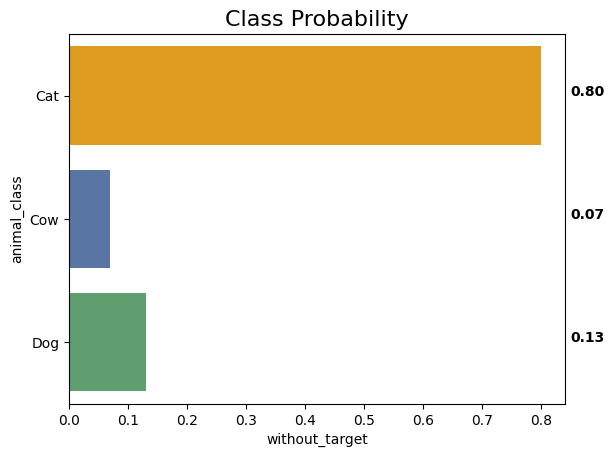

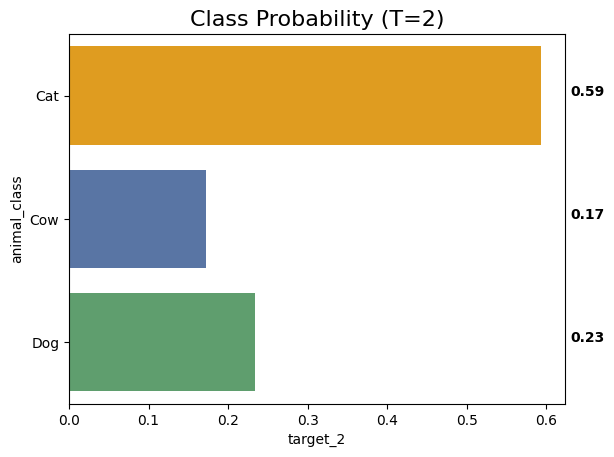

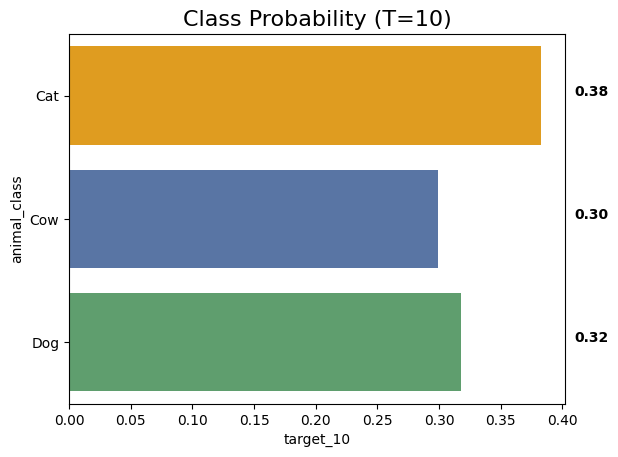

In [156]:
fig = sns.barplot(x=df.without_target, y=df.animal_class, orient='h', palette = ["#ffa500","#4c72b0" , "#55a868"])
fig.set()
xlocs, xlabs = plt.xticks()
plt.title('Class Probability', fontsize=16)

prob = list(df.without_target)
prob = [ '%.2f' % elem for elem in prob ]
for i, v in enumerate(prob):
    if i == 0:
        plt.text(float(v) + 0.05, i , str(v), color='black', fontweight='bold')
    if i == 1:
        plt.text(float(v) + 0.78, i , str(v), color='black', fontweight='bold')
    if i == 2:
        plt.text(float(v) + 0.72, i , str(v), color='black', fontweight='bold')
plt.savefig('class_probabilty_without_temperature.png',
    facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')           
plt.show()
 
fig2 = sns.barplot(x=df.target_2, y=df.animal_class, orient='h', palette = ["#ffa500","#4c72b0" , "#55a868"])
fig2.set()
plt.title('Class Probability (T=2)', fontsize=16)
prob = list(df.target_2)
prob = [ '%.2f' % elem for elem in prob ]
for i, v in enumerate(prob):
    if i == 0:
        plt.text(float(v) + 0.04, i , str(v), color='black', fontweight='bold')
    if i == 1:
        plt.text(float(v) + 0.46, i , str(v), color='black', fontweight='bold')
    if i == 2:
        plt.text(float(v) + 0.40, i , str(v), color='black', fontweight='bold')
plt.savefig('class_probabilty_temperature_2.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')       
plt.show()

fig3 = sns.barplot(x=df.target_10, y=df.animal_class, orient='h', palette =["#ffa500","#4c72b0" , "#55a868"])
fig3.set()
plt.title('Class Probability (T=10)', fontsize=16)
prob = list(df.target_10)
prob = [ '%.2f' % elem for elem in prob ]
for i, v in enumerate(prob):
    if i == 0:
        plt.text(float(v) + 0.03, i , str(v), color='black', fontweight='bold')
    if i == 1:
        plt.text(float(v) + 0.11, i , str(v), color='black', fontweight='bold')
    if i == 2:
        plt.text(float(v) + 0.09, i , str(v), color='black', fontweight='bold')
plt.savefig('class_probabilty_temperature_10.png',
    facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')       
plt.show()

### Reference 

[Softmax 에 Temperature Scaling 를 적용할 때 영향](https://3months.tistory.com/491)